GSAPP PLA6113 Wednesday February 10th, 2021<br>
Exploring Urban Data with ML
# Feature Engineering and Dimensionality Reduction

# Principal Component Analysis (PCA)

Definition: PCA reduces data by geometrically projecting them onto lower dimensions called principal components, with the goal of finding the best summary of the data using a limited number of principal components.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

If you want to know more about mathematical expressions, see below.

### Principle of PCA: Maximum variance formulation

Consider a dataset $\{\bf{x_n} \}$ with $n=1, ..., N$ and each $\bf{x_n}$ in $\mathbb{R}^D$. We want to project $\{\bf{x_n} \}$ down to a lower-dimensional subspace of $\mathbb{R}^D$ with dimension $d<D$. For now consider $d$ fixed.

Indeed let $d=1$ so that we are considering projecting onto a one-dimensional subspace (a line). This line can be represented by a unit-length vector $\bf{u_1}$. Each point $\bf{x_n}$ gets projected onto a single real number via the inner (dot) product:
$$\begin{equation}
{\bf x_n} \to {\bf x_n}\cdot {\bf u_1}
\end{equation}$$

The mean of the projected data is 
$$\begin{equation}
{\bf \bar{x} \cdot  u_1} = \frac{1}{N} \sum_n {\bf x_n \cdot u_1}
\end{equation}$$

and the variance of the projected data is (switching from dot product notation to transpose and matrix multiplication notation)
$$\begin{equation}
\frac{1}{N} \sum_n \left( \bf u_1^T x_n - u_1^T \bar{x} \right)^2 = {\bf u_1^T S u_1}
\end{equation}$$
where ${\bf S}$ is the data covariance matrix given by

$$\begin{equation}
{\bf S }\equiv \frac{1}{N} \sum_n ( \bf x_n - \bar{x} ) ( \bf x_n - \bar{x} )^T
\end{equation}$$

We want to maximize ${\bf u_1^T S u_1}$ over all unit-length vectors ${\bf u_1}$, i.e. those vectors satisfying:

$$\begin{equation}
{\bf u_1^T u_1 } = 1
\end{equation}$$

To solve this constrained optimization problem we introduce a Lagrange multiplier $\lambda_1$ to enforce the constraint:

$$\begin{equation}
\mathcal{L} = {\bf u_1^T S u_1} + \lambda_1 (1 - {\bf u_1^T u_1 })
\end{equation}$$

Differentiating w.r.t. ${\bf u_1}$ and setting equal to zero we have

$$\begin{equation}
\frac{\partial \mathcal{L}}{\partial {\bf u_1}} =  2{\bf S u_1} -2 \lambda_1 {\bf u_1}=0
\end{equation}$$

that is

$$\begin{equation}
{\bf S u_1} = \lambda_1 {\bf u_1}
\end{equation}$$

which is to say that ${\bf u_1}$ is an eigenvector of ${\bf S}$.

Therefore, in order to maximize the variance of the projection onto ${\bf u_1}$, we should choose ${\bf u_1}$
to be equal to the eigenvector with largest eigenvalue. This eigenvector (which by the way isn't unique) is known as the first principal component.

So we've found the "best" subspace (w.r.t. maximizing the variance that is) for the case $d=1$. What about $d>1$?

Evidently, the "best" subspace for the case $d>1$ is just the subspace spanned by the first $d$ eigenvectors of ${\bf S}$. That is, if we arrange the eigenvalues of ${\bf S}$ in decreasing order with $\lambda_1 \ge \lambda_2 \ge \lambda_3 ...$ and with corresponding eigenvectors ${\bf u_1, u_2, u_3}, ...$ then the best projection is the one that projects onto the subspace formed by $\{ {\bf u_1, u_2, u_3, ..., u_d } \}$

# 1. 2D Example

Here is a great example explained visually (2D, 3D, and 17D)<br>
http://setosa.io/ev/principal-component-analysis/

### 1) Create some random normally distributed data and plot

In [2]:
# Create random data points (two dimensional like two feature columns)
# np.dot: Dot product of two arrays
# .T is a 'transpose' function
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T 

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

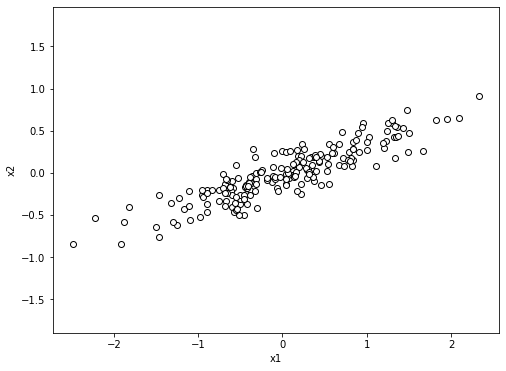

In [3]:
plt.figure(figsize=(8,6))
plt.plot(X[:,0], X[:,1], 'o', c='white', markeredgecolor = 'black')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')

In [4]:
np.sum(np.var(X, axis = 0))

0.7771043494141933

### 2) Principal Component Anlalysis (PCA)
Load PCA module <br>
More information about sklearn PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [5]:
from sklearn.decomposition import PCA

    Syntax:
    YOUR_PCA_MODEL_NAME = PCA(n_components=k).fit(X)
    k is number of components to keep.

In [6]:
pca = PCA(n_components=2).fit(X)

How much variance are explained by the first and the second principal components:

    YOUR_PCA_MODEL_NAME.explained_variance_
    
Vectors of principal components:

    YOUR_PCA_MODEL_NAME.components_

In [7]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [8]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

### 3) Let's plot the two principal components with the scatter plot

(-2.7292712056271964,
 2.5702744393352615,
 -0.9497608386363481,
 1.0052301483776818)

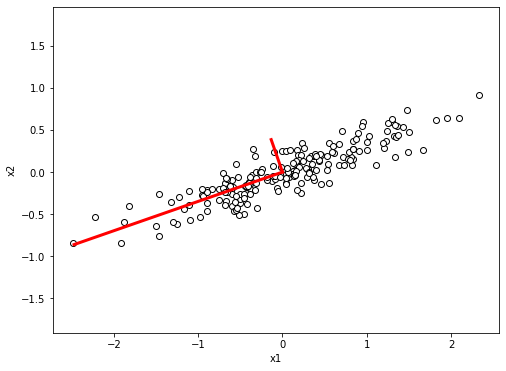

In [9]:
plt.figure(figsize=(8,6))
plt.plot(X[:,0], X[:,1], 'o', c='white', markeredgecolor = 'black')

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-r', lw=3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')

### 4) Let's project the data onto the first principal component

In [10]:
pca1 = PCA(n_components=1)
X_trans = pca1.fit_transform(X)
X_new = pca1.inverse_transform(X_trans)

(-2.731158226766438,
 2.609901883259332,
 -0.9672765706389315,
 1.0060642308539953)

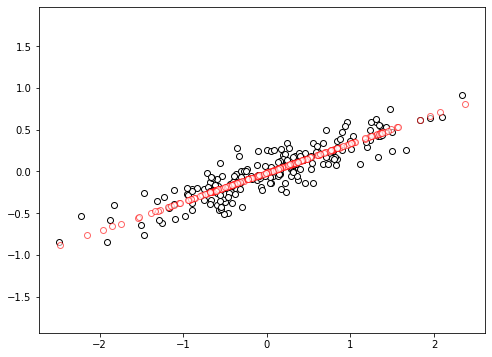

In [11]:
plt.figure(figsize=(8,6))
plt.plot(X[:, 0], X[:, 1], 'o', c='white', markeredgecolor='k')
plt.plot(X_new[:, 0], X_new[:, 1], 'o',c='white', markeredgecolor='R', alpha=0.6)
plt.axis('equal')

The projection based on the first principal component looks like
* Maximize the variance of the projected data on the principle component direction
* Minimize residuals between the data points and their projections


### 5)  Instead, let's project onto the 2nd eigenvector (which only explains a small fraction of the variance)

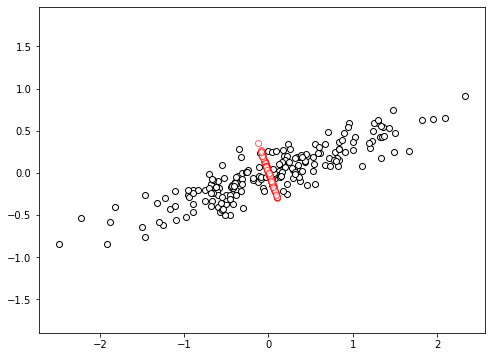

In [12]:
e2=pca.components_[1,:]

X_new2=(np.dot(X,e2)*e2.reshape((2,1))).T
plt.figure(figsize=(8,6))
plt.plot(X[:, 0], X[:, 1], 'o', c='white', markeredgecolor='k')
plt.plot(X_new2[:, 0], X_new2[:, 1], 'o',c='white', markeredgecolor='R', alpha=0.6)
plt.axis('equal');

# 2. Tabular Dataset Example
Now we are going to working on tabular data with 30 features. We will see if the projected data after PCA can represent the most valuable parts of the variables.

### 1) Load required modules and the breast cancer dataset provided by sklearn

StandardScalar is a function to standardize features by removing the mean and scaling to unit variance (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer 

#### Load the breast cancer data
* ['data'] is features (predictors)
* ['target'] is the two classes of the breast cancer (0=malignant, 1=benign)

In [14]:
cancer = load_breast_cancer()

#### Standardize features
The standard score of a sample x is calculated as:

    z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [15]:
scaler = StandardScaler().fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [16]:
print (cancer.data[0])
print (X_scaled[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


In [17]:
X_scaled.shape

(569, 30)

### 2) Principal Component Anlalysis (PCA)

Let's keep the first two principal components of the data

In [18]:
pca = PCA(n_components=2).fit(X_scaled)

How much variance are explained by the first and the second principal components:

    YOUR_PCA_MODEL_NAME.explained_variance_

Vectors of principal components:

    YOUR_PCA_MODEL_NAME.components_

In [19]:
print("Total variance of the data (original 30D :", np.sum(np.var(X_scaled,axis=0)))
print("Variance explained via the first and second components:\n" , pca.explained_variance_)
print("Variance explained via the first and second components (ratio):\n", pca.explained_variance_ratio_)

Total variance of the data (original 30D : 30.000000000000004
Variance explained via the first and second components:
 [13.30499079  5.7013746 ]
Variance explained via the first and second components (ratio):
 [0.44272026 0.18971182]


### Approximately 63% of the variance is explained by two principal components. 

In [20]:
print("Principal components (eigenvector):\n", pca.components_)

Principal components (eigenvector):
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Transform data onto the first two principal components (30D to 2D):
    
    YOUR_PCA_MODEL_NAME.transform()

In [21]:
X_pca = pca.transform(X_scaled) 
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


### 3) Let's plot the two principal components and the projected data points, together with two different labels from the target

Text(0, 0.5, 'Second principal component')

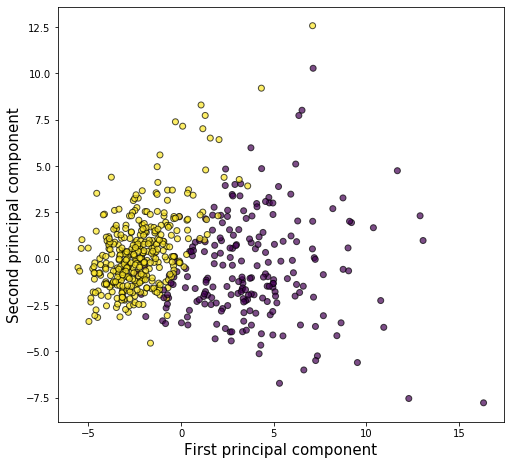

In [25]:
plt.figure(figsize=(8, 8)) 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, edgecolors='k', alpha=0.7) 
plt.gca().set_aspect("equal") 
plt.xlabel("First principal component", fontsize=15) 
plt.ylabel("Second principal component",fontsize=15)

### Conclusion: Even though we reduce 30-dimensional data to 2-dimensional data, the two classes separate quite well in this two-dimensional space. We can use the simplified (projected) data in 2D space for further ML modeling (classification).

### 4) Let's try a higher dimension (30D to 10D)
Above, the most important two principal components explained 63.4% of total variance of the data. Let's see how it change if we have a higher dimensional data. 

In [26]:
pca_10 = PCA(n_components=10).fit(X_scaled)

print("Total variance of the data (original 30D :", np.sum(np.var(X_scaled,axis=0)))
print("Variance explained via the first and second components:\n" , pca_10.explained_variance_)
print("Variance explained via the first and second components (ratio):\n", pca_10.explained_variance_ratio_)

Total variance of the data (original 30D : 30.000000000000004
Variance explained via the first and second components:
 [13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224
  0.67640888  0.47745625  0.41762878  0.35131087]
Variance explained via the first and second components (ratio):
 [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]


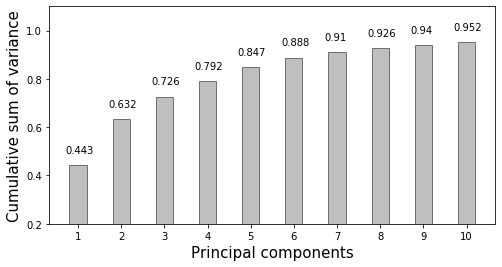

In [27]:
var_ratio = pca_10.explained_variance_ratio_
var_acc = np.cumsum(var_ratio).round(3)
    
plt.figure(figsize=(8,4))
plt.bar(range(10),var_acc, width=0.4, color='grey', edgecolor='k', alpha=0.5)
plt.xlabel('Principal components', fontsize=15)
plt.ylabel('Cumulative sum of variance', fontsize=15)
plt.ylim(0.2,1.1)
plt.xticks(range(10),range(1,11))

for i in range(len(var_acc)):
    plt.annotate(str(var_acc[i]), xy=(list(range(10))[i]-0.3,var_acc[i]+0.05))

plt.show()

### Conclusion: 7 most principal components explain more than 91% of features' variance. Based on the cumulative sum of the principal components' variance, you can decide how many componets are needed to explain enough your original data features. As a reminder, PCA
* Combinines input variables in a specific way
* Then drops the "least important" variables 
* While still retaining "the most valuable parts" of all of the variables


# 3. Sparse PCA
Standard PCA is relatively quick and easy to implement since it just amounts to finding eigenvectors. One possible drawback of PCA is that the leading eigenvectors will in general have entirely (or almost entirely) non-zero components. That is, a typical eigenvector is a linear combination of every dimension in the data. This can possibly be an impediment to visualization and data exploration, i.e. it can make interpretability trickier. Also, if your goal is to throw out certain dimensions in the data entirely (say, you stop collecting them in your survey) you don't really want such dense eigenvectors, rather what you want is sparse eigenvectors.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html

(In general solving this sort of constrained optimization problem is going to be much trickier than regular PCA, which is substantially easier to solve. Consequently, we won't get into the details here.)

Use the SparsePCA module from sklearn to do Sparse PCA on the dataset. __Notice that the alpha parameter controls the amount of sparsity.__ First, choose a very large value of alpha. You should find that the identified principal components are all trivial (i.e. all identically zero). As you lower alpha, the leading principal component will at some point become non-trivial. 

### 1) Load Sparse PCA module

In [28]:
from sklearn.decomposition import SparsePCA

### 2) Load data
In this problem you'll use Sparse PCA on a (subset of a) publicly available community-level dataset with a large-ish number of real-valued features related to socioeconomic and crime statistics. See here for more details on the dataset: http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

In [30]:
data = pd.read_csv('../data/communities.csv')
print (data.shape)
data.head()

(1994, 26)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.03


In [31]:
data['ViolentCrimesPerPop_binary']=data['ViolentCrimesPerPop']>np.mean(data['ViolentCrimesPerPop'])                                                                    
data = data.astype(float)
values = data.values
print("Features:\n",data.columns.values[0:25])
print("\nPrediction target:",data.columns.values[25:27])

Features:
 ['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctAsian'
 'racePctHisp' 'agePct12t21' 'agePct12t29' 'agePct16t24' 'agePct65up'
 'numbUrban' 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf' 'pctWInvInc'
 'pctWSocSec' 'pctWPubAsst' 'pctWRetire' 'medFamInc' 'perCapInc'
 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap']

Prediction target: ['ViolentCrimesPerPop' 'ViolentCrimesPerPop_binary']


### 3) What is the first non-trivial feature identified as important by Sparse PCA? 
(This may depend on some of the choices you make, e.g. which underlying sklearn algorithm you use)

In [32]:
# alpha = 35
spca = SparsePCA(n_components=1,alpha=35)
X_proj = spca.fit_transform(values[:,0:25])
print("**************************SparsePCA with alpha=35************************************")
print("Leading principal component:\n", spca.components_)

# alpha = 33
spca = SparsePCA(n_components=1,alpha=33)
X_proj = spca.fit_transform(values[:,0:25])
print("**************************SparsePCA with alpha=33************************************")
print("Leading principal component:\n", spca.components_)
print("First non-zero feature:",data.columns[0:25][spca.components_[0]!=0])

**************************SparsePCA with alpha=35************************************
Leading principal component:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]
**************************SparsePCA with alpha=33************************************
Leading principal component:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]
First non-zero feature: Index([], dtype='object')


Text(0, 0.5, 'Principal components')

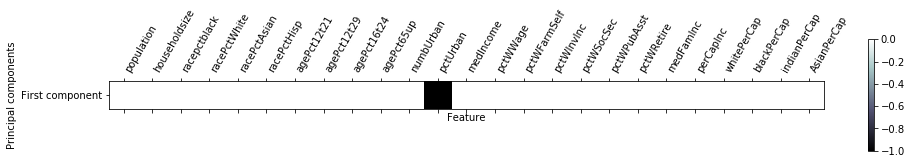

In [44]:
plt.matshow(spca.components_, cmap='bone') 
plt.yticks([0], ["First component"]) 
plt.colorbar() 
plt.xticks(range(len(data.columns.values[0:25])),           
                          data.columns.values[0:25], rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")

### 4) Let's take lower a lower alpha
 As you lower alpha, the leading principal component will at some point become non-trivial. 

**************************SparsePCA with alpha=20************************************
Leading principal component:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]
First non-zero feature: Index([], dtype='object')


Text(0, 0.5, 'Principal components')

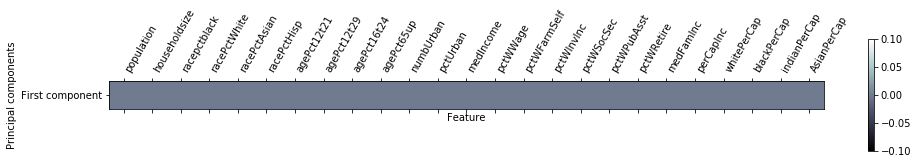

In [45]:
# SparsePCA with alpha=20
spca = SparsePCA(n_components=1,alpha=20)
X_proj = spca.fit_transform(values[:,0:25])
print("**************************SparsePCA with alpha=20************************************")
print("Leading principal component:\n", spca.components_)
print("First non-zero feature:",data.columns[0:25][spca.components_[0]!=0])

plt.matshow(spca.components_, cmap='bone') 
plt.yticks([0], ["First component"]) 
plt.colorbar() 
plt.xticks(range(len(data.columns.values[0:25])),           
                          data.columns.values[0:25], rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")

**************************SparsePCA with alpha=10************************************
Leading principal component:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]]
First non-zero feature: Index(['pctUrban'], dtype='object')


Text(0, 0.5, 'Principal components')

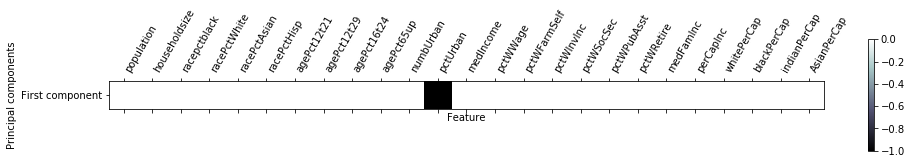

In [43]:
# SparsePCA with alpha=10
spca = SparsePCA(n_components=1,alpha=10)
X_proj = spca.fit_transform(values[:,0:25])
print("**************************SparsePCA with alpha=10************************************")
print("Leading principal component:\n", spca.components_)
print("First non-zero feature:",data.columns[0:25][spca.components_[0]!=0])

plt.matshow(spca.components_, cmap='bone') 
plt.yticks([0], ["First component"]) 
plt.colorbar() 
plt.xticks(range(len(data.columns.values[0:25])),           
                          data.columns.values[0:25], rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")

**************************SparsePCA with alpha=2************************************
Leading principal component:
 [[ 0.          0.          0.          0.         -0.08452926  0.
   0.01437503  0.          0.          0.          0.         -0.84732
  -0.24991722 -0.09934853  0.04212761 -0.13330995  0.03209831  0.17139411
   0.         -0.23043401 -0.21349224 -0.19896766 -0.11347906  0.
  -0.03565544]]
First non-zero feature: Index(['racePctAsian', 'agePct12t21', 'pctUrban', 'medIncome', 'pctWWage',
       'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'medFamInc',
       'perCapInc', 'whitePerCap', 'blackPerCap', 'AsianPerCap'],
      dtype='object')


Text(0, 0.5, 'Principal components')

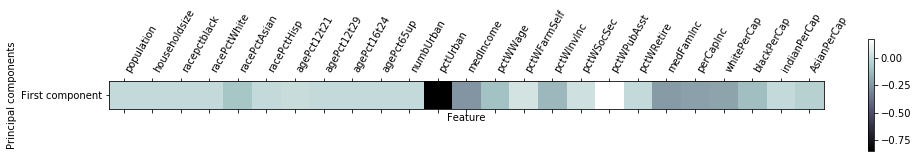

In [36]:
# SparsePCA with alpha=2
spca = SparsePCA(n_components=1,alpha=2)
X_proj = spca.fit_transform(values[:,0:25])
print("**************************SparsePCA with alpha=2************************************")
print("Leading principal component:\n", spca.components_)
print("First non-zero feature:",data.columns[0:25][spca.components_[0]!=0])

plt.matshow(spca.components_, cmap='bone') 
plt.yticks([0], ["First component"]) 
plt.colorbar() 
plt.xticks(range(len(data.columns.values[0:25])),           
                          data.columns.values[0:25], rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")

### Conclusion: Sparse PCA takes advantages in several aspects, including computational efficiency, high explained variance and an abilityin identifying important variables.